In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
df=pd.read_csv("affairs.csv")

In [39]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3,32.0,9.0,3.0,3,17,2,5,1
1,3,27.0,13.0,3.0,1,14,3,4,1
2,4,22.0,2.5,0.0,1,16,3,5,1
3,4,37.0,16.5,4.0,3,16,5,5,1
4,5,27.0,9.0,1.0,1,14,3,4,1


In [40]:
df.shape

(6366, 9)

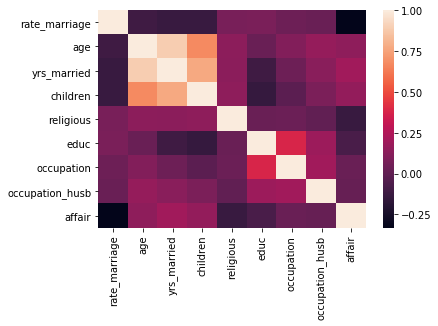

In [41]:
sns.heatmap(df.corr())

In [42]:
df.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affair             0
dtype: int64

In [43]:
sns.barplot(x='rate_marriage',y=affair',data=df)

SyntaxError: EOL while scanning string literal (<ipython-input-43-5d9e061603cf>, line 1)

The graph show that affairs depend on rate marriage

In [44]:
features=df.iloc[:,:-1].values
labels=df.iloc[:,-1].values


In [45]:
from sklearn.model_selection import train_test_split
features_train,features_test,labels_train,labels_test=train_test_split(features,labels,test_size=0.25,random_state=0)


In [46]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, p = 2)
classifier.fit(features_train,labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [47]:
labels_pred=classifier.predict(features_test)

In [48]:
labels_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [49]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(labels_test,labels_pred)

In [50]:
cm

array([[921, 179],
       [324, 168]], dtype=int64)

In [51]:
from sklearn.linear_model import LogisticRegression
regr=LogisticRegression()
regr.fit(features_train,labels_train)

C:\Users\Himanshu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [52]:
labels_pred1=regr.predict(features_test)

In [55]:
regr.score(features_test,labels_test)

0.7324120603015075

In [56]:
regr.score(features_train,labels_train)

0.7195224130708001

In [58]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affair
0,3,32.0,9.0,3.0,3,17,2,5,1
1,3,27.0,13.0,3.0,1,14,3,4,1
2,4,22.0,2.5,0.0,1,16,3,5,1
3,4,37.0,16.5,4.0,3,16,5,5,1
4,5,27.0,9.0,1.0,1,14,3,4,1


In [59]:
x=[3,24,3,1,4,16,4,2]
a=np.array(x)
a=a.reshape(1,-1)
regr.predict(a)

array([0], dtype=int64)